In [3]:
df=pd.read_csv("D:\\AppStoneLab\\Day 1\\Titanic-Dataset.csv")
df.dropna(inplace=True)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [2]:
#encoding
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
df=pd.read_csv("D:\\AppStoneLab\\Day 1\\Titanic-Dataset.csv")
print(df['Embarked'].head())

LE=LabelEncoder()
df['Embarked']=LE.fit_transform(df['Embarked'])
print(df['Embarked'].head())

OHE=OneHotEncoder(sparse_output=False)
Sex_OHE=OHE.fit_transform(df[['Sex']])
Sex_OHE=pd.DataFrame(Sex_OHE,columns=OHE.get_feature_names_out(['Sex']))
Sex_OHE.head()

0    S
1    C
2    S
3    S
4    S
Name: Embarked, dtype: object
0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64


,Sex_female,Sex_male
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0


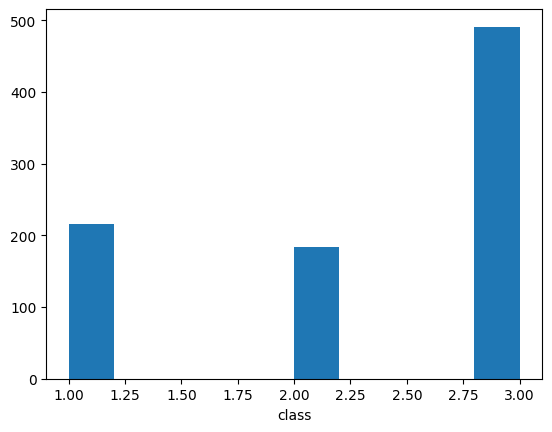

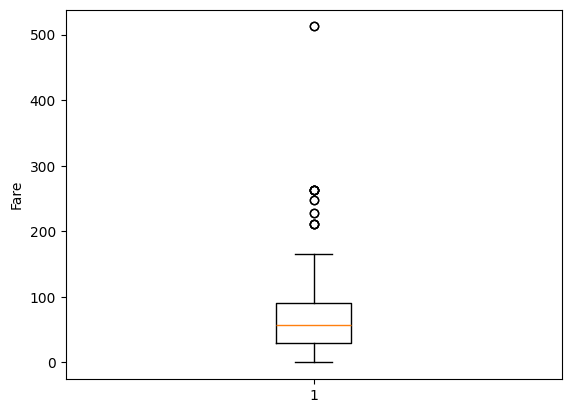

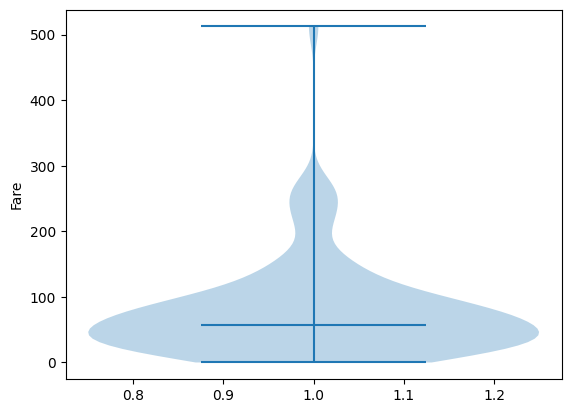

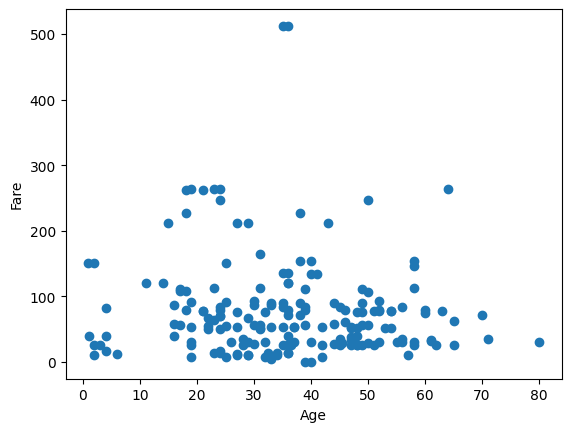

In [4]:
#EDA

import matplotlib.pyplot as plt
import seaborn as sns

df=pd.read_csv("D:\\AppStoneLab\\Day 1\\Titanic-Dataset.csv")

plt.hist(df['Pclass'])
plt.xlabel("class")
plt.show()

df.dropna(inplace=True)
plt.boxplot(df['Fare'])
plt.ylabel('Fare')
plt.show()

df.dropna(inplace=True)
plt.violinplot(df['Fare'], showmedians=True)
plt.ylabel('Fare')
plt.show()

plt.scatter(x=df['Age'],y=df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.show()

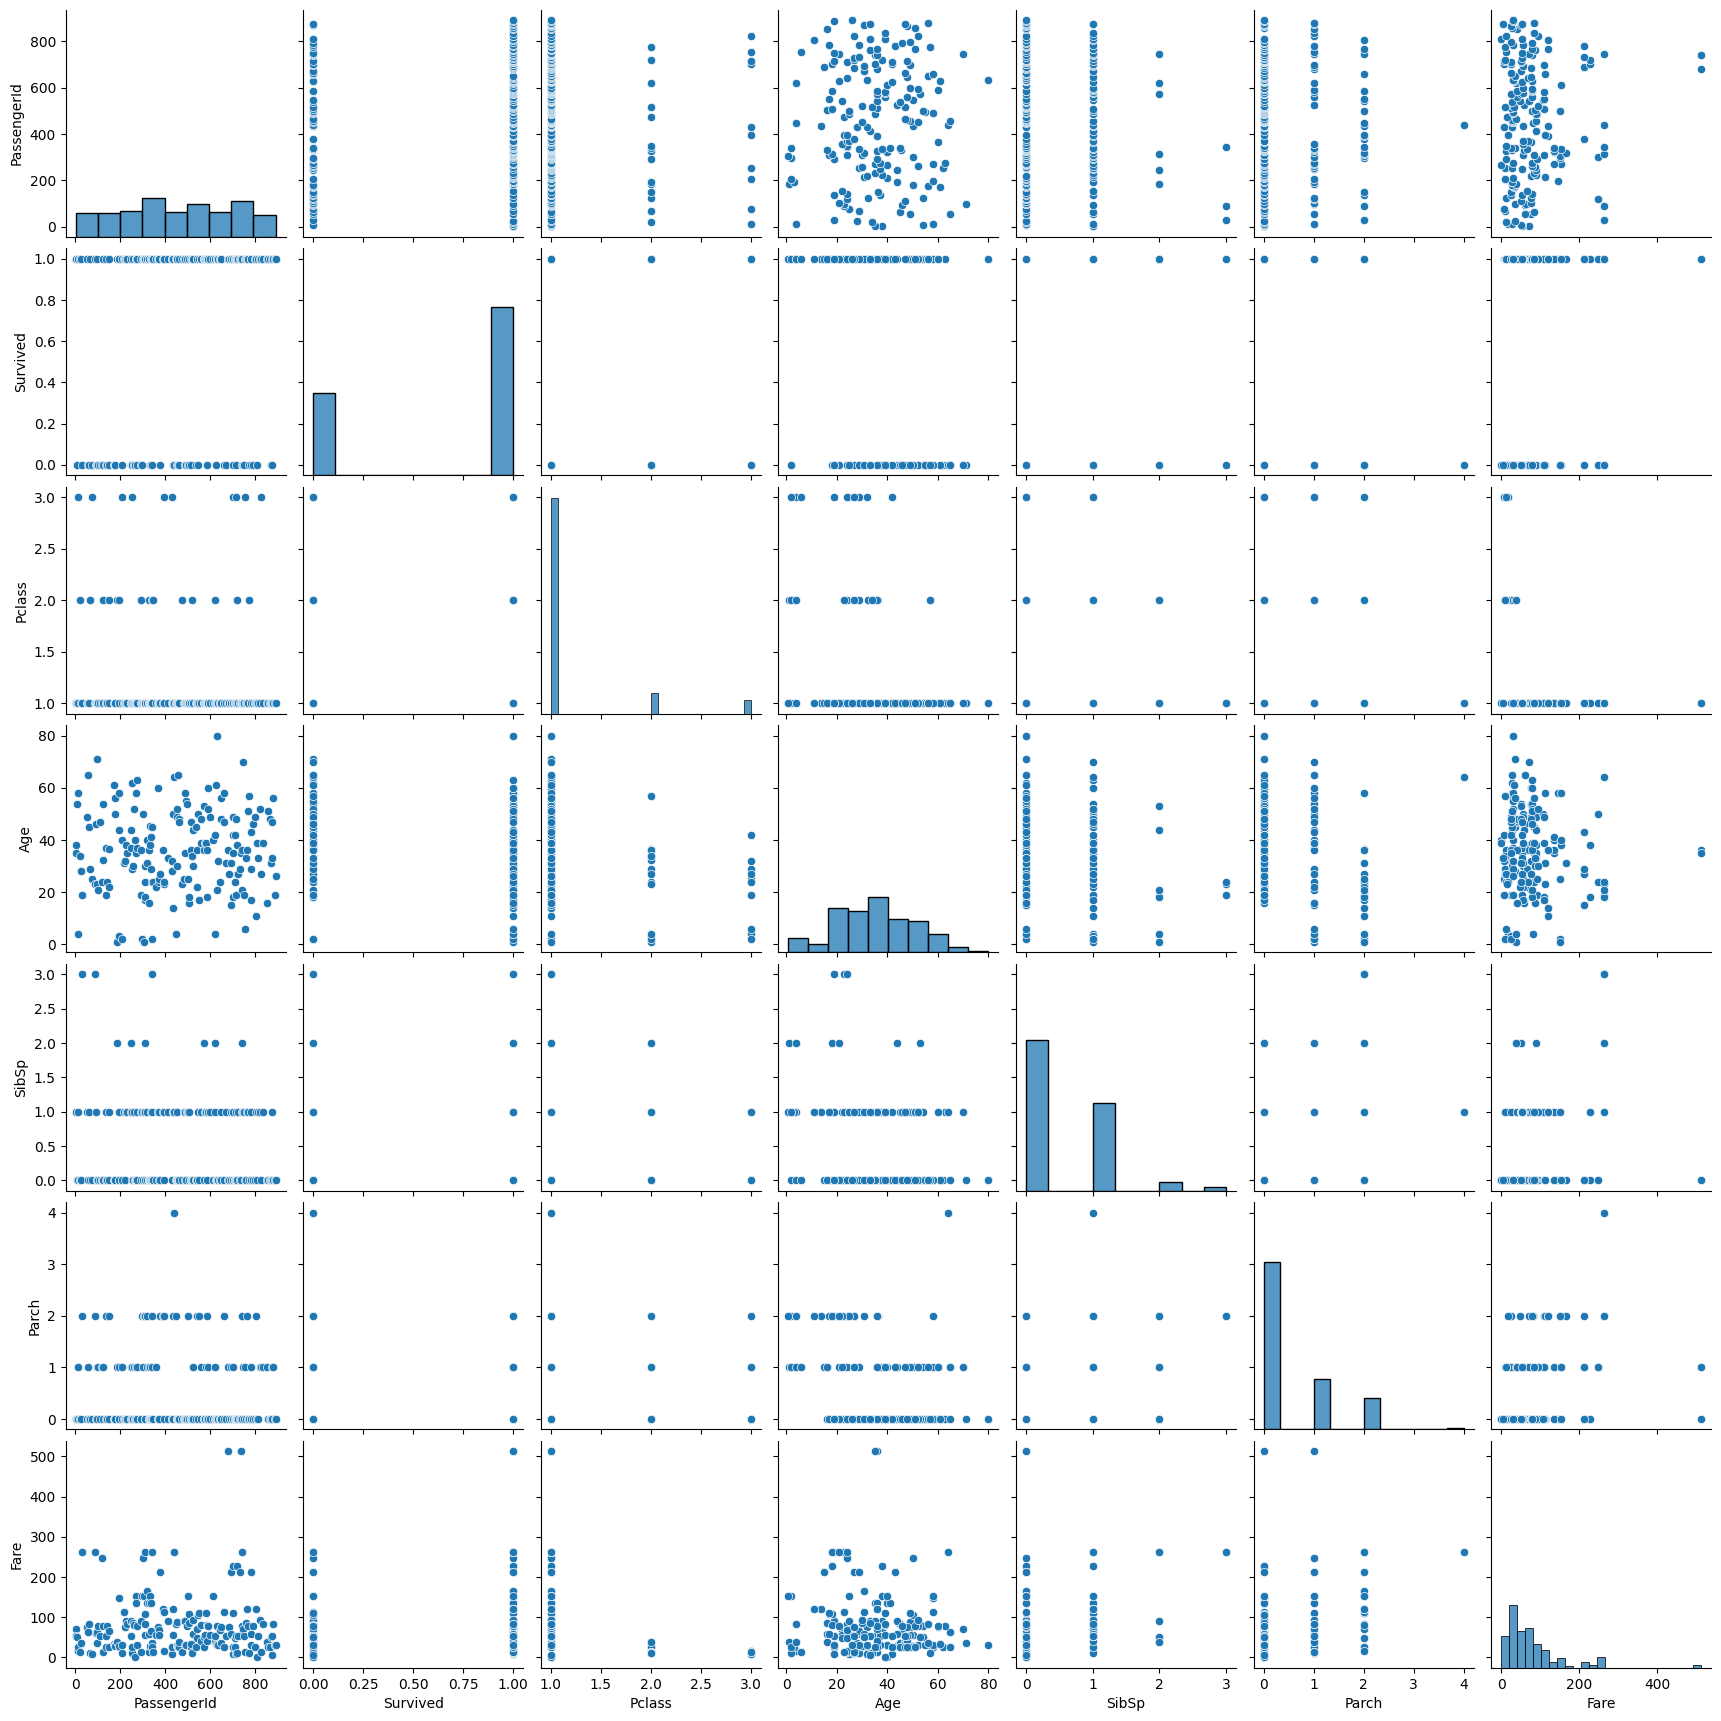

<Axes: >

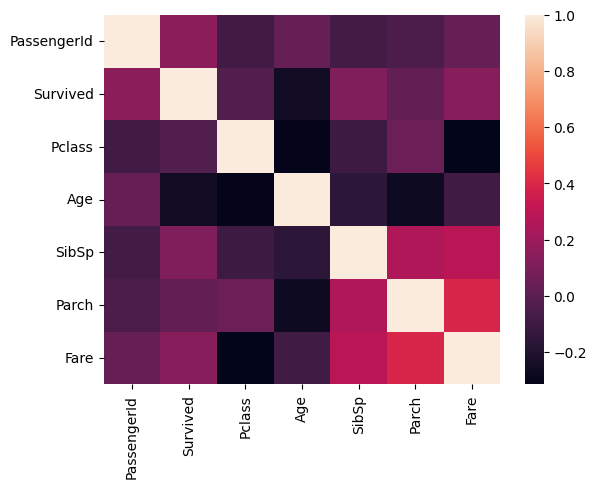

In [5]:
#Feature relationships
import seaborn as sns
df=pd.read_csv("D:\\AppStoneLab\\Day 1\\Titanic-Dataset.csv")
df.dropna(inplace=True)
sns.pairplot(df)
plt.show()

numerical_cols=df.select_dtypes(include=['int','float'])
corr=numerical_cols.corr()
sns.heatmap(corr)

In [6]:
df=pd.read_csv("D:\\AppStoneLab\\Day 1\\Titanic-Dataset.csv")
df.dropna(inplace=True)

print("Age greater than 75:\n",df[df['Age']>75])

print("\nlocation 3:\n",df.loc[3])
print("\nindex location 3:\n",df.iloc[3])

df.head(10)

Age greater than 75:
      PassengerId  Survived  Pclass                                  Name  \
630          631         1       1  Barkworth, Mr. Algernon Henry Wilson   

      Sex   Age  SibSp  Parch Ticket  Fare Cabin Embarked  
630  male  80.0      0      0  27042  30.0   A23        S  

location 3:
 PassengerId                                               4
Survived                                                  1
Pclass                                                    1
Name           Futrelle, Mrs. Jacques Heath (Lily May Peel)
Sex                                                  female
Age                                                    35.0
SibSp                                                     1
Parch                                                     0
Ticket                                               113803
Fare                                                   53.1
Cabin                                                  C123
Embarked                       

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [7]:
#pivot tables

df=pd.read_csv('D:\\AppStoneLab\\Day 1\\Titanic-Dataset.csv')
df.dropna(inplace=True)
df.set_index('PassengerId',inplace=True, append=True)

pt1=df.pivot_table(values='Fare', index='Pclass', columns='Sex', aggfunc='mean')
print(pt1)

pt2=df.pivot_table(values=['Fare','Age'], index='Pclass', columns='Sex', aggfunc='sum')
pt2

Sex         female       male
Pclass                       
1       103.128209  75.957888
2        14.865744  23.812500
3        13.360000   8.695000


Age                Fare           
Sex     female     male     female       male
Pclass                                       
1       2523.0  3416.42  7631.4875  6380.4626
2        266.5   112.50   133.7917   142.8750
3         86.0   124.00    66.8000    43.4750

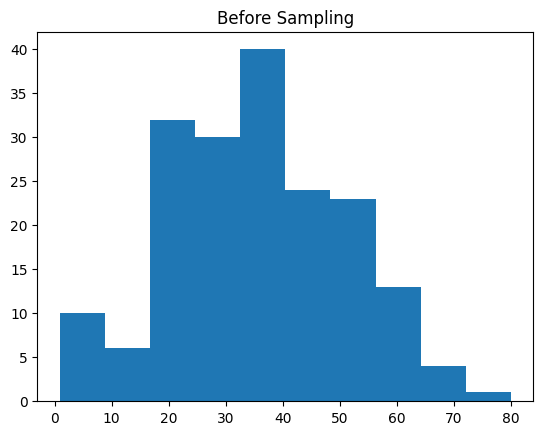

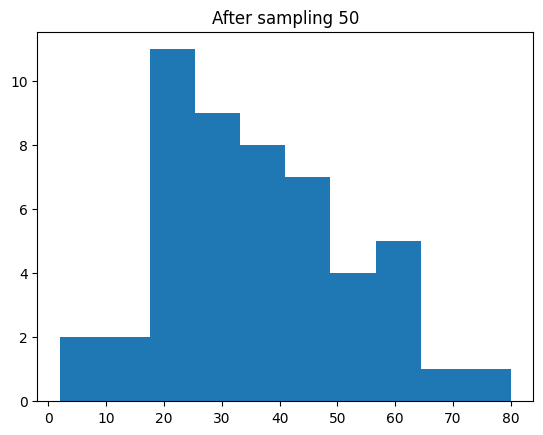

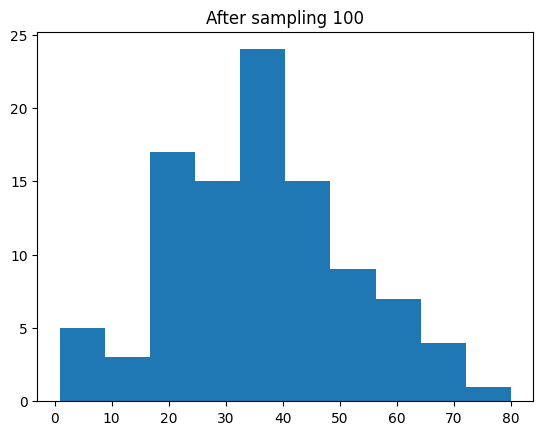

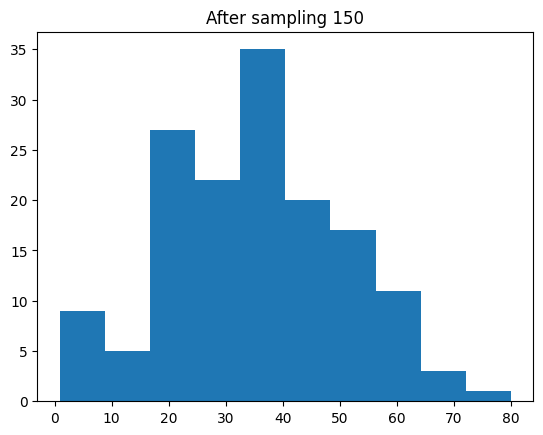

In [8]:
#data sampling

df=pd.read_csv("D:\\AppStoneLab\\Day 1\\Titanic-Dataset.csv")
df.dropna(inplace=True)

plt.hist(df['Age'])
plt.title('Before Sampling')
plt.show()

sample_df=df.sample(50)
plt.hist(sample_df['Age'])
plt.title('After sampling 50')
plt.show()

sample_df=df.sample(100)
plt.hist(sample_df['Age'])
plt.title('After sampling 100')
plt.show()

sample_df=df.sample(150)
plt.hist(sample_df['Age'])
plt.title('After sampling 150')
plt.show()